In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn import datasets
iris = datasets.load_iris()
data = iris.data
def DENCLUE(data, eps=0.3, min_samples=10):
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(data)
    coreSampleMask = np.zeros_like(db.labels_, dtype = bool)
    coreSampleMask[db.core_sample_indices_] = True
    clusterLabels = iris.target
    uniqueClusterLabels = set(clusterLabels)
    colors = ['#ff0000', '#00ff00', '#0000ff']
    markers = ['^', 'v','o']
    for i, cluster in enumerate(uniqueClusterLabels):
        clusterIndex = (clusterLabels == cluster)
        coreSamples = data[clusterIndex & coreSampleMask]
        plt.scatter(coreSamples[:, 0] + coreSamples[:, 1], coreSamples[:, 2] + coreSamples[:, 3],c=colors[i],  marker=markers[i], s=80)
        noiseSamples = data[clusterIndex & ~coreSampleMask]
        plt.scatter(noiseSamples[:, 0] + noiseSamples[:, 1],noiseSamples[:, 2] + noiseSamples[:, 3], c=colors[i], marker=markers[i], s=26)
    plt.show()

def get_density(self, x, X, y=None, sample_weight=None):
    superweight = 0.
    n_samples = X.shape[0]
    n_features = X.shape[1]
    if sample_weight is None:
        sample_weight = np.ones((n_samples, 1))
    else:
        sample_weight = sample_weight
    for y in range(n_samples):
        kernel = kernelize(x, X[y], h=self.h, degree=n_features)
        kernel = kernel * sample_weight[y] / (self.h ** n_features)
        superweight = superweight + kernel
    density = superweight / np.sum(sample_weight)
    return density


def kernelize(x, y, h, degree):
    kernel = np.exp(-(np.linalg.norm(x - y) / h) ** 2. / 2.) / ((2. * np.pi) ** (degree / 2))
    return kernel

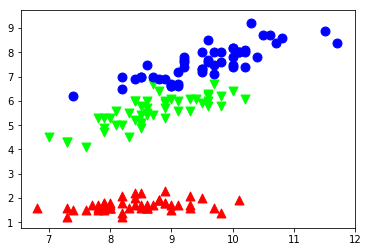

In [7]:
DENCLUE(data, 10, 10)